# 伪彩图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#信号伪彩图" data-toc-modified-id="信号伪彩图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>信号伪彩图</a></span><ul class="toc-item"><li><span><a href="#读取雷达信号图（历史测试数据）" data-toc-modified-id="读取雷达信号图（历史测试数据）-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>读取雷达信号图（历史测试数据）</a></span></li><li><span><a href="#绘制雷达伪彩图" data-toc-modified-id="绘制雷达伪彩图-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>绘制雷达伪彩图</a></span></li></ul></li><li><span><a href="#扫描伪彩图绘制" data-toc-modified-id="扫描伪彩图绘制-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>扫描伪彩图绘制</a></span><ul class="toc-item"><li><span><a href="#载入数据" data-toc-modified-id="载入数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>载入数据</a></span></li><li><span><a href="#使用pcolormesh绘制图片" data-toc-modified-id="使用pcolormesh绘制图片-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>使用pcolormesh绘制图片</a></span></li></ul></li></ul></div>

## 信号伪彩图

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'PingFang HK'

### 读取雷达信号图（历史测试数据）

In [4]:
file = r'../data/lidarData.txt'
df = pd.read_csv(file, index_col=0)
# 以列为单位丢弃含有nan值的列
df.dropna(axis=1, inplace=True)
df

,2019/09/19 00:00:30,2019/09/19 00:05:23,2019/09/19 00:10:16,2019/09/19 00:15:09,2019/09/19 00:20:03,2019/09/19 00:24:56,2019/09/19 00:29:49,2019/09/19 00:34:43,2019/09/19 00:39:36,2019/09/19 00:44:29,...,2019/09/19 23:08:53,2019/09/19 23:13:47,2019/09/19 23:18:40,2019/09/19 23:23:33,2019/09/19 23:28:27,2019/09/19 23:33:20,2019/09/19 23:38:13,2019/09/19 23:43:07,2019/09/19 23:48:00,2019/09/19 23:52:53
Height(km)\Time,,,,,,,,,,,,,,,,,,,,,
0.0000,0.006,0.000,0.005,0.000,0.000,0.003,0.006,0.003,0.001,0.002,...,0.004,0.000,0.002,0.001,0.005,0.001,0.001,0.000,0.001,0.000
0.0075,0.009,0.000,0.008,0.000,0.000,0.005,0.010,0.005,0.001,0.004,...,0.006,0.000,0.004,0.002,0.008,0.001,0.002,0.001,0.002,0.000
0.0150,0.011,0.000,0.009,0.000,0.000,0.006,0.011,0.006,0.001,0.005,...,0.007,0.000,0.004,0.002,0.010,0.002,0.002,0.001,0.003,0.000
0.0225,0.012,0.000,0.010,0.000,0.000,0.006,0.012,0.006,0.002,0.005,...,0.007,0.000,0.005,0.002,0.010,0.002,0.002,0.001,0.003,0.000
0.0300,0.012,0.000,0.010,0.000,0.000,0.007,0.013,0.006,0.002,0.005,...,0.007,0.000,0.005,0.002,0.011,0.002,0.002,0.001,0.003,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.9700,0.019,0.019,0.017,0.020,0.016,0.013,0.018,0.020,0.014,0.018,...,0.004,0.005,0.008,0.005,0.003,0.005,0.005,0.002,0.005,0.004
14.9775,0.009,0.009,0.008,0.010,0.008,0.005,0.009,0.010,0.006,0.009,...,0.000,0.001,0.002,0.001,0.002,0.001,0.000,0.001,0.000,0.000
14.9850,0.001,0.002,0.001,0.002,0.001,0.003,0.001,0.002,0.000,0.001,...,0.000,0.001,0.001,0.001,0.001,0.001,0.000,0.001,0.000,0.000


### 绘制雷达伪彩图

In [5]:
def lidar_pic(data, show_height=5, hide=True, save_pic=False):
    # 获取数据长度及对应雷达数据最大高度
    H, _height = len(data), data.index[len(data)-1]
    fig, axes = plt.subplots(figsize=(12, 4))
    # 依据显示高度截取数据
    _sli = int(H/_height*show_height)
    height=data.iloc[:,0]
    
    tic = H // _height
    if hide:
        # 处理盲区
        _data = data.iloc[int(H/_height*0.2):_sli, :]
        s_tic = np.arange(1., 1.+show_height)
        d_tic = (s_tic - 0.2) * tic
        d_tic = [0] + list(d_tic)
        s_tic = [0.2] + list(s_tic)
    else:
        _data = data.iloc[:_sli, :]
        s_tic = np.arange(.0, 1.+show_height)
        d_tic = s_tic * tic

    
    p=axes.imshow(_data, vmax=1,vmin=0,origin="lower",aspect='auto', cmap='jet')

    idx = list(plt.xticks()[0][1:].astype(int))[:-1]

    plt.yticks(d_tic, s_tic)
    plt.xticks(idx, [data.columns[item][:-3].replace(' ', '\n') for item in idx])
    plt.colorbar(p)
    
    if save_pic:
        plt.savefig('lidar.png')
    plt.show()

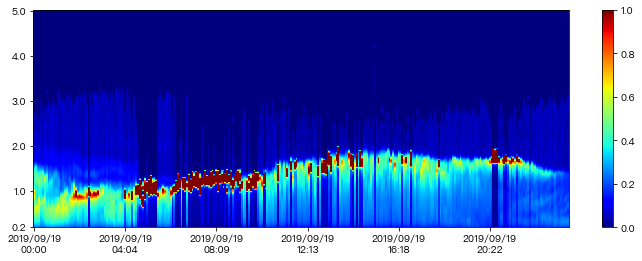

In [6]:
lidar_pic(df)

+ cma可选参数
<br>Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

## 扫描伪彩图绘制

### 载入数据

In [2]:
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator

In [3]:
file = r'../data/extin532_117.2382_34.29608_H_SCAN0_360_2_20191204033224.txt'
df = pd.read_csv(file, skiprows=2, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,0.0000,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,...,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,0.012343,NaN
1,0.0075,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,...,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,NaN
2,0.0150,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,...,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,0.012342,NaN
3,0.0225,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,...,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,NaN
4,0.0300,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,...,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,0.012341,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,14.9700,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,...,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,0.011455,NaN
1997,14.9775,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,...,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,NaN
1998,14.9850,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,...,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,NaN
1999,14.9925,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,...,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,0.011454,NaN


In [4]:
# 取出数据区域为5Km，过滤最后一行的空值
data = df.iloc[:688, 1:-1]

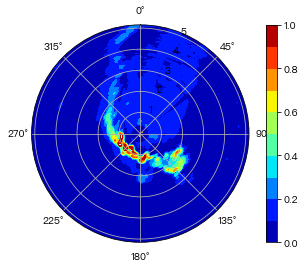

In [5]:
def colormap():
  cdict = [ 'yellow',  'darkorange','orangered' ,'red','darkred']
  return colors.ListedColormap(cdict, 'indexed')

azimuths = np.radians(np.linspace(0, 360, data.shape[-1]))
zeniths = df.iloc[:688, 0].to_numpy()
theta, r = np.meshgrid(azimuths, zeniths)

levels = MaxNLocator(nbins=10).tick_values(0, 1)
ax = plt.subplot(projection = 'polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction('clockwise')
pos = ax.contourf(theta, r, data, levels=levels, cmap = 'jet')
plt.colorbar(pos,ax = ax)
plt.show()

### 使用pcolormesh绘制图片

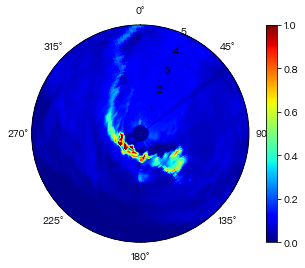

In [7]:
ax = plt.subplot(projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction('clockwise')
pos = ax.pcolormesh(theta, r, data, cmap='jet', vmin=0, vmax=1)
plt.colorbar(pos, ax=ax)
plt.show()